In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pickle as pkl

In [2]:
df = pd.read_csv('survey lung cancer.csv')

In [3]:
df['GENDER'].replace(['M','F'],[1,2],inplace = True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10112\2565740072.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GENDER'].replace(['M','F'],[1,2],inplace = True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10112\2565740072.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GENDER'].replace(

In [4]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [5]:
df.drop(['YELLOW_FINGERS'],axis='columns',inplace = True)

In [6]:
df.drop(['ANXIETY'],axis='columns',inplace = True)

In [7]:
df.drop(['ALLERGY '],axis='columns',inplace = True)

In [8]:
df.drop(['PEER_PRESSURE'],axis='columns',inplace = True)

In [9]:
df

,GENDER,AGE,SMOKING,CHRONIC DISEASE,FATIGUE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,1,2,2,2,2,2,2,2,1
1,1,74,2,2,2,1,1,1,2,2,2,1
2,2,59,1,1,2,2,1,2,2,1,2,0
3,1,63,2,1,1,1,2,1,1,2,2,0
4,2,63,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
304,2,56,1,2,2,1,2,2,2,2,1,1
305,1,70,2,1,2,2,2,2,2,1,2,1
306,1,58,2,1,1,2,2,2,1,1,2,1
307,1,67,2,1,2,1,2,2,2,1,2,1


In [10]:
df.duplicated().sum()

np.int64(35)

In [11]:
df['GENDER'].replace(['M','F'],[1,2],inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10112\1469101967.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GENDER'].replace(['M','F'],[1,2],inplace=True)


In [12]:
df

,GENDER,AGE,SMOKING,CHRONIC DISEASE,FATIGUE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,1,2,2,2,2,2,2,2,1
1,1,74,2,2,2,1,1,1,2,2,2,1
2,2,59,1,1,2,2,1,2,2,1,2,0
3,1,63,2,1,1,1,2,1,1,2,2,0
4,2,63,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
304,2,56,1,2,2,1,2,2,2,2,1,1
305,1,70,2,1,2,2,2,2,2,1,2,1
306,1,58,2,1,1,2,2,2,1,1,2,1
307,1,67,2,1,2,1,2,2,2,1,2,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   CHRONIC DISEASE        309 non-null    int64
 4   FATIGUE                309 non-null    int64
 5   WHEEZING               309 non-null    int64
 6   ALCOHOL CONSUMING      309 non-null    int64
 7   COUGHING               309 non-null    int64
 8   SHORTNESS OF BREATH    309 non-null    int64
 9   SWALLOWING DIFFICULTY  309 non-null    int64
 10  CHEST PAIN             309 non-null    int64
 11  LUNG_CANCER            309 non-null    int64
dtypes: int64(12)
memory usage: 29.1 KB


In [14]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'CHRONIC DISEASE', 'FATIGUE ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [15]:
X = df[['GENDER', 'AGE', 'SMOKING',
      'CHRONIC DISEASE', 'FATIGUE ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']]

In [16]:
Y = df['LUNG_CANCER']

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,309.0,1.475728,0.500221,1.0,1.0,1.0,2.0,2.0
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
COUGHING,309.0,1.579288,0.494474,1.0,1.0,2.0,2.0,2.0
SHORTNESS OF BREATH,309.0,1.640777,0.480551,1.0,1.0,2.0,2.0,2.0
SWALLOWING DIFFICULTY,309.0,1.469256,0.499863,1.0,1.0,1.0,2.0,2.0


In [18]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'CHRONIC DISEASE', 'FATIGUE ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

Dropping UnWanted Columns

In [19]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'CHRONIC DISEASE', 'FATIGUE ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [21]:
x_train.shape

(216, 11)

In [22]:
x_test.shape

(93, 11)

In [23]:
y_train.shape

(216,)

In [24]:
y_test.shape

(93,)

# Logistic Regression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(x_train,y_train)

c:\Users\ADMIN\Downloads\project\Lung Cancer Classifiacation using Logistic Regression\pyvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred = model.predict(x_test)

In [28]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [29]:
model.score(x_train,y_train)

0.8981481481481481

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
from sklearn.metrics import confusion_matrix, classification_report,precision_score

In [32]:
lacc = accuracy_score(y_test,y_pred)

In [33]:
lacc

0.946236559139785

In [34]:
confusion_matrix(y_test,y_pred)

array([[ 2,  5],
       [ 0, 86]])

In [35]:
acc = ((5+2)/(5+2+0+86))#TP+TN/TP+TN+FP+PN
print('accuracy',acc)

accuracy 0.07526881720430108


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.95      1.00      0.97        86

    accuracy                           0.95        93
   macro avg       0.97      0.64      0.71        93
weighted avg       0.95      0.95      0.93        93



<Axes: >

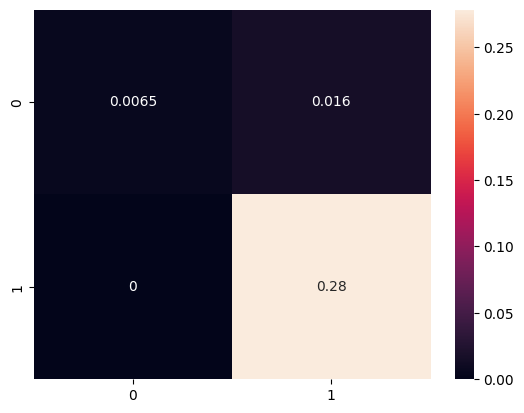

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred) / len(Y), annot = True)

# Normalising usind MinMax Scalar and Rebuilt Logistic Regression

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
x_trained = scaler.fit_transform(x_train)
x_tested = scaler.transform(x_test)

In [40]:
x_trained.shape

(216, 11)

# Create new logistic regression model, fit on normalized training set and predict on the normalisation test set

In [41]:
model1 = LogisticRegression()

In [42]:
model1.fit(x_trained,y_train)

LogisticRegression()

In [43]:
y_pred1 = model1.predict(x_tested)

In [44]:
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [45]:
model1.score(x_trained,y_train)

0.8842592592592593

In [46]:
acc1 = accuracy_score(y_test,y_pred1)

In [47]:
acc1

0.946236559139785

In [48]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.95      1.00      0.97        86

    accuracy                           0.95        93
   macro avg       0.97      0.64      0.71        93
weighted avg       0.95      0.95      0.93        93



# Decision Tree Classifier

In [49]:
model2 = DecisionTreeClassifier()

In [50]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred2 = model2.predict(x_test)

In [52]:
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [53]:
model2.score(x_train,y_train)

0.9953703703703703

In [54]:
acc2 = accuracy_score(y_test,y_pred2)

In [55]:
acc2

0.9354838709677419

In [56]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.97      0.97      0.97        86

    accuracy                           0.94        93
   macro avg       0.77      0.77      0.77        93
weighted avg       0.94      0.94      0.94        93



# Random Forest Classifier

In [57]:
model3 = RandomForestClassifier()

In [58]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
y_pred3 = model3.predict(x_test)

In [60]:
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [61]:
model3.score(x_train,y_train)

0.9953703703703703

In [62]:
acc3 = accuracy_score(y_test,y_pred3)

In [63]:
acc3

0.946236559139785

In [64]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.96      0.99      0.97        86

    accuracy                           0.95        93
   macro avg       0.85      0.71      0.76        93
weighted avg       0.94      0.95      0.94        93



# Support Vector Machine Classifiation

In [65]:
model4 = svm.SVC(kernel = 'linear')

In [66]:
model4.fit(x_train,y_train)

SVC(kernel='linear')

In [67]:
y_pred4 = model4.predict(x_test)

In [68]:
y_pred4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [69]:
acc4 = accuracy_score(y_test,y_pred4)

In [70]:
acc4

0.946236559139785

In [71]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.95      1.00      0.97        86

    accuracy                           0.95        93
   macro avg       0.97      0.64      0.71        93
weighted avg       0.95      0.95      0.93        93



# KNeighborsClassifier

In [72]:
model5 = KNeighborsClassifier()

In [73]:
model5.fit(x_train,y_train)

KNeighborsClassifier()

In [74]:
y_pred5 = model5.predict(x_test)

In [75]:
y_pred5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1])

In [76]:
acc5 = accuracy_score(y_test,y_pred5)

In [77]:
acc5

0.9247311827956989

In [78]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.93      0.99      0.96        86

    accuracy                           0.92        93
   macro avg       0.72      0.57      0.59        93
weighted avg       0.90      0.92      0.90        93



# Naive Bayes Classifier

In [79]:
model6 = GaussianNB()

In [80]:
model6.fit(x_train,y_train)

GaussianNB()

In [81]:
y_pred6 = model6.predict(x_test)

In [82]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [83]:
acc6 = accuracy_score(y_test,y_pred4)

In [84]:
acc6

0.946236559139785

In [85]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.95      0.95      0.95        86

    accuracy                           0.91        93
   macro avg       0.69      0.69      0.69        93
weighted avg       0.91      0.91      0.91        93



# Finding Best Model

In [86]:
print('Logistic Regression',lacc)
print('Logistic Regression with MinmaxScaler',acc1)
print('Decision Tree classifier',acc2)
print('Random Forest classifier',acc3)
print('support vector machine classifier',acc4)
print('k nearest neighbour classifier',acc5)
print('naive bayes classifier',acc6)

Logistic Regression 0.946236559139785
Logistic Regression with MinmaxScaler 0.946236559139785
Decision Tree classifier 0.9354838709677419
Random Forest classifier 0.946236559139785
support vector machine classifier 0.946236559139785
k nearest neighbour classifier 0.9247311827956989
naive bayes classifier 0.946236559139785


# Decision Tree is the best model with the best accuracy of 96%

In [87]:
c = pkl.dump(model,open('cancer.pkl','wb'))